# Ch.6 NumPy



*   This chapter gives an overview of NumPy, the core tool for performant numerical computing with Python.
*   NumPy facilitates creating and manipulating numerical data in Python.




# 6.1. The NumPy array object

## 6.1.1. What are NumPy and NumPy arrays?

### NumPy arrays

**Python objects:**


*   high-level number objects: integers, floating point
*   containers: lists, tuples, dictionaries, etc





**NumPy provides:**

*   extension package to Python for multi-dimensional arrays
*   closer to hardware (efficiency)
*   designed for scientific computation (convenience)
*   Also known as *array oriented computing*


In [ ]:
import numpy as np

a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

For example, An array containing:


*   values of an experiment at discrete time steps
*   signal recorded by a measurement device, e.g. sound wave
*   pixels of an image, grey-level or colour
*   3-D data measured at different X-Y-Z positions, e.g. MRI scan
*   ...



**Why it is useful:** Memory-efficient container that provides fast numerical operations.

In [ ]:
L = range(1000)
%timeit [i**2 for i in L]

76.4 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
a = np.arange(1000)
%timeit a**2

1.52 µs ± 343 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### NumPy Reference documentation

*   On the web: [https://numpy.org/doc/](https://numpy.org/doc/)

*   Interactive help:

In [ ]:
np.array?

*   Looking for something:

In [ ]:
np.con*?

### Import conventions

The recommended convention to import NumPy is:

In [ ]:
import numpy as np

## 6.1.2. Creating arrays

### Manual construction of arrays

*   **1-D:**

In [ ]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [ ]:
a.ndim   #차원

1

In [ ]:
a.shape  #형태

(4,)

In [ ]:
len(a)

4

*   **2-D, 3-D, …:**

In [ ]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
b.ndim

2

In [ ]:
b.shape

(2, 3)

In [ ]:
len(b)

2

In [ ]:
c = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
c

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [ ]:
c.shape

(2, 2, 2)

In [ ]:
c[:,:,0]

array([[1, 3],
       [5, 7]])

In [ ]:
c[:,:,1]

array([[2, 4],
       [6, 8]])

In [ ]:
c[0,1,1]

np.int64(4)

### Functions for creating arrays

In practice, we rarely enter items one by one...

*   Evenly spaced:

In [ ]:
a = np.arange(10)           # 0 .. n-1
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = np.arange(1, 9, 2)      # start, end (exclusive), step
b

array([1, 3, 5, 7])

*   or by number of points:

In [ ]:
c = np.linspace(0, 1, 6)    # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [ ]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

*   Common arrays:

In [ ]:
a = np.ones((3, 3))         # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [ ]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

*   **np.random:** generating random numbers:

In [ ]:
rng = np.random.default_rng(27446968)
a = rng.random(4)             # uniform in [0, 1]
a

array([0.64613018, 0.48984931, 0.50851229, 0.22563948])

In [ ]:
b = rng.standard_normal(4)    # Gaussian
b

array([-0.38250769, -0.61536465,  0.98131732,  0.59353096])

## 6.1.3. Basic data types

You may have noticed that, in some instances, array elements are displayed with a trailing dot (e.g. `2.` vs `2`). This is due to a difference in the data-type used:

In [ ]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [ ]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Different data-types allow us to store data more compactly in memory, but most of the time we simply work with floating point numbers. Note that, in the example above, NumPy auto-detects the data-type from the input.

You can explicitly specify which data-type you want:

In [ ]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [ ]:
c

The default data type is floating point:


In [ ]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

There are also other types:

*   **Complex:**

In [ ]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

*   **Bool:**

In [ ]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

*   **String:**

In [ ]:
f = np.array(['Bonjour', 'Hello', 'Hallo'])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U7')

## 6.1.4. Index and slicing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[0]

np.int64(0)

In [ ]:
a[2]

np.int64(2)

In [ ]:
a[-1]

np.int64(9)

In [ ]:
a[-2]

np.int64(8)

In [ ]:
a[2:9:3]

array([2, 5, 8])

In [ ]:
a[:4]

array([0, 1, 2, 3])

In [ ]:
a[1:3]

array([1, 2])

In [ ]:
a[::2]

array([0, 2, 4, 6, 8])

In [ ]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
b=np.arange(5)

In [ ]:
b[::-1]

array([4, 3, 2, 1, 0])

 **Warning:** Indices begin at 0, like other Python sequences (and C/C++).

For multidimensional arrays, indices are tuples of integers:

In [ ]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [ ]:
a[1, 1]

np.int64(1)

In [ ]:
a[2, 1] = 10    # third line, second column

In [ ]:
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [ ]:
a[2]

array([ 0, 10,  2])

**Note:**

*   In 2D, the first dimension corresponds to **rows**, the second to **columns**.
*   for multidimensional `a`, `a[0]` is interpreted by taking all elements in the unspecified dimensions.

**Slicing:** Arrays, like other Python sequences can also be sliced:

In [ ]:
import numpy as np

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[2:9:3]    # [start:end:step]

array([2, 5, 8])

Note that the last index is not included! :



In [ ]:
a[:4]

array([0, 1, 2, 3])

All three slice components are not required: by default, *start* is 0, *end* is the last and *step* is 1:

In [ ]:
a[1:3]

array([1, 2])

In [ ]:
a[::2]

array([0, 2, 4, 6, 8])

In [ ]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

The usual python idiom for reversing a sequence is supported:

In [ ]:
a[::-1]

A small illustrated summary of NumPy indexing and slicing...

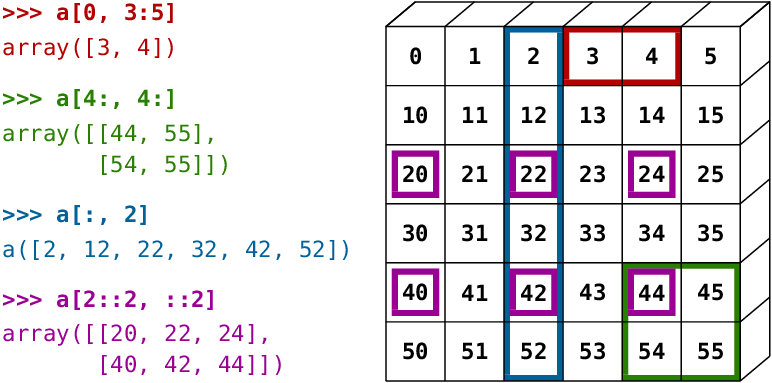

You can also combine assignment and slicing:

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[5:] = 10

In [ ]:
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [ ]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [ ]:
b[::-1]

array([4, 3, 2, 1, 0])

In [ ]:
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## 6.1.5. Copies and views

A slicing operation creates a **view** on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory. You can use `np.may_share_memory()` to check if two arrays share the same memory block.

**When modifying the view, the original array is modified as well:**

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [ ]:
np.may_share_memory(a, b)

False

In [ ]:
b[0] = 12
b

array([12,  1,  2,  3,  4])

In [ ]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a = np.arange(10)

In [ ]:
c = a[::2].copy()    # force a copy

In [ ]:
c

array([0, 2, 4, 6, 8])

In [ ]:
c[0] = 12

In [ ]:
c

array([0, 2, 4, 6, 8])

In [ ]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.may_share_memory(a, c)

False

This behavior can be surprising at first sight... but it allows to save both memory and time.

## 6.1.6. Fancy indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (**masks**). This method is called fancy indexing. It creates **copies not views**.

### Using boolean masks

In [ ]:
rng = np.random.default_rng(27446968)
a = rng.integers(0, 21, 15)
a

array([ 3, 13, 12, 10, 10, 10, 18,  4,  8,  5,  6, 11, 12, 17,  3])

In [ ]:
(a % 3 == 0)

array([ True, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True, False,  True])

In [ ]:
mask = (a % 3 == 0)

In [ ]:
extract_from_a              # extract a sub-array with the mask

NameError: name 'extract_from_a' is not defined

In [ ]:
extract_from_a = a[mask]    # or,  a[a%3==0]

In [ ]:
extract_from_a[0] = 0

In [ ]:
extract_from_a

array([ 0, 12, 18,  6, 12,  3])

In [ ]:
a

array([ 3, 13, 12, 10, 10, 10, 18,  4,  8,  5,  6, 11, 12, 17,  3])

Indexing with a mask can be very useful to assign a new value to a sub-array:

In [ ]:
a[a % 3 == 0] = -1
a

array([-1, 13, -1, 10, 10, 10, -1,  4,  8,  5, -1, 11, -1, 17, -1])

### Indexing with an array of integers

In [ ]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Indexing can be done with an array of integers, where the same index is repeated several time:

In [ ]:
a[np.array([2, 3, 2, 4, 2])]

array([20, 30, 20, 40, 20])

In [ ]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

New values can be assigned with this kind of indexing:


In [ ]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

When a new array is created by indexing with an array of integers, the new array has the same shape as the array of integers:

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
idx = np.array([[3, 4], [9, 7]])
a[idx]

array([[3, 4],
       [9, 7]])

The image below illustrates various fancy indexing applications

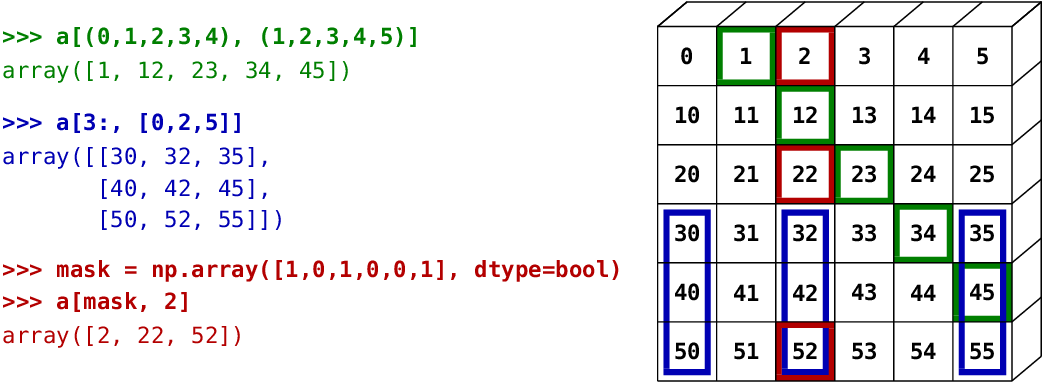

# 6.2. Numerical operations on arrays

## 6.2.1. Elementwise operations

### Basic operations

With scalars:

In [ ]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [ ]:
a + 1

array([2, 3, 4, 5])

In [ ]:
2**a

array([ 2,  4,  8, 16])

All arithmetic operates elementwise:


In [ ]:
b = np.ones(4) + 1
b

array([2., 2., 2., 2.])

In [ ]:
a - b

array([-1.,  0.,  1.,  2.])

In [ ]:
a * b

array([2., 4., 6., 8.])

In [ ]:
j = np.arange(5)
j

array([0, 1, 2, 3, 4])

In [ ]:
j + 1

array([1, 2, 3, 4, 5])

In [ ]:
2**(j + 1)

array([ 2,  4,  8, 16, 32])

In [ ]:
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

These operations are of course much faster than if you did them in pure python:

In [ ]:
a = np.arange(10000)
%timeit a + 1

4.35 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
l = range(10000)
%timeit [i+1 for i in l]

**Warning: Array multiplication is not matrix multiplication:**


In [ ]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

**Note: Matrix multiplication:**

In [ ]:
c @ c

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

### Other operations

**Comparisons:**

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])

In [ ]:
a == b

array([False,  True, False,  True])

In [ ]:
a > b

array([False, False,  True, False])

Array-wise comparisons:

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])

In [ ]:
np.array_equal(a, b)

False

In [ ]:
np.array_equal(a, c)

True

**Logical operations:**

In [ ]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)

In [ ]:
a

array([ True,  True, False, False])

In [ ]:
b

In [ ]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [ ]:
np.logical_and(a, b)

array([ True, False, False, False])

**Transcendental functions:**

In [ ]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [ ]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [ ]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [ ]:
np.log(np.exp(a))

array([0., 1., 2., 3., 4.])

**Shape mismatches**

In [ ]:
a = np.arange(4)
a, a.shape

(array([0, 1, 2, 3]), (4,))

In [ ]:
a + np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

Broadcasting? We’ll return to that later.

**Transposition:**

In [ ]:
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
np.triu(np.ones((5, 5)), 3)

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [ ]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

**Note:**

The transpose returns a view of the original array:

In [ ]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
a.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [ ]:
a.T[0, 2] = 999
a.T

array([[  0,   3, 999],
       [  1,   4,   7],
       [  2,   5,   8]])

In [ ]:
a

array([[  0,   1,   2],
       [  3,   4,   5],
       [999,   7,   8]])

## 6.2.2. Basic reduction

### Computing sums

In [ ]:
x = np.array([1, 2, 3, 4])
np.sum(x)

np.int64(10)

In [ ]:
x.sum()

np.int64(10)

Sum by rows and by columns:

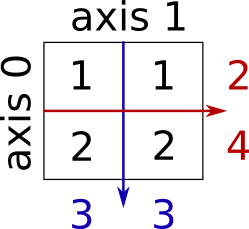

In [ ]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [ ]:
x.sum(axis=0)    # sum over rows, for each column

array([3, 3])

In [ ]:
x.sum(axis=1)    # sum over columns, for each row

array([2, 4])

In [ ]:
x[:, 0].sum(), x[:, 1].sum()

(np.int64(3), np.int64(3))

In [ ]:
x[0, :].sum(), x[1, :].sum()

(np.int64(2), np.int64(4))

Same idea in higher dimensions:

In [ ]:
rng = np.random.default_rng(27446968)
x = rng.random((2, 2, 2))
x

array([[[0.64613018, 0.48984931],
        [0.50851229, 0.22563948]],

       [[0.27567831, 0.53656835],
        [0.81055379, 0.92206861]]])

In [ ]:
x.sum(axis=2)

array([[1.13597949, 0.73415176],
       [0.81224666, 1.73262241]])

In [ ]:
x.sum(axis=2)[0, 1]

np.float64(0.7341517644004746)

In [ ]:
x[0, 1, :].sum()

### Other reductions

— works the same way (and take `axis=`)

**Extrema:**

In [ ]:
x = np.array([1, 3, 2])
x.min(), x.max()

(np.int64(1), np.int64(3))

In [ ]:
x.argmin()    # index of minimum

np.int64(0)

In [ ]:
x.argmax()    # index of maximum

np.int64(1)

**Logical operations:**

In [ ]:
np.all([True, True, False])

np.False_

In [ ]:
np.any([True, True, False])

np.True_

**Note:** Can be used for array comparisons:

In [ ]:
a = np.zeros((100, 100))
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.any(a != 0)

np.False_

In [ ]:
a == a

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
np.all(a == a)

np.True_

In [ ]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])

In [ ]:
a <= b

array([ True,  True,  True,  True])

In [ ]:
b <= c

array([ True,  True,  True,  True])

In [ ]:
((a <= b) & (b <= c))

array([ True,  True,  True,  True])

In [ ]:
((a <= b) & (b <= c)).all()

np.True_

**Statistics:**

In [ ]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])

In [ ]:
x

array([1, 2, 3, 1])

In [ ]:
x.mean()

np.float64(1.75)

In [ ]:
x.std()

In [ ]:
np.median(x)

In [ ]:
y

In [ ]:
np.median(y, axis=0)

array([3., 4., 2.])

In [ ]:
np.sum(y, axis=1)

array([ 6, 12])

In [ ]:
np.median(y, axis=-1)    # last axis

... and many more (best to learn as you go).

## 6.2.3. Broadcasting



*   Basic operations on numpy arrays (addition, etc.) are elementwise.
*   This works on arrays of the same size.





**Nevertheless**, It's also possible to do operations on arrays of different sizes if NumPy can transform these arrays so that they all have the same size: this conversion is called **broadcasting**.

**Broadcasting Rules:**

1.  If the number of dimensions differs, the smaller shape is padded with ones on the left. For example, (3, ) → (1, 3).
2.  For each dimension, the sizes must either be equal or one of them must be 1; otherwise, an error occurs.
3.  During operations, dimensions with size 1 are automatically replicated.





The image below gives an example of broadcasting:

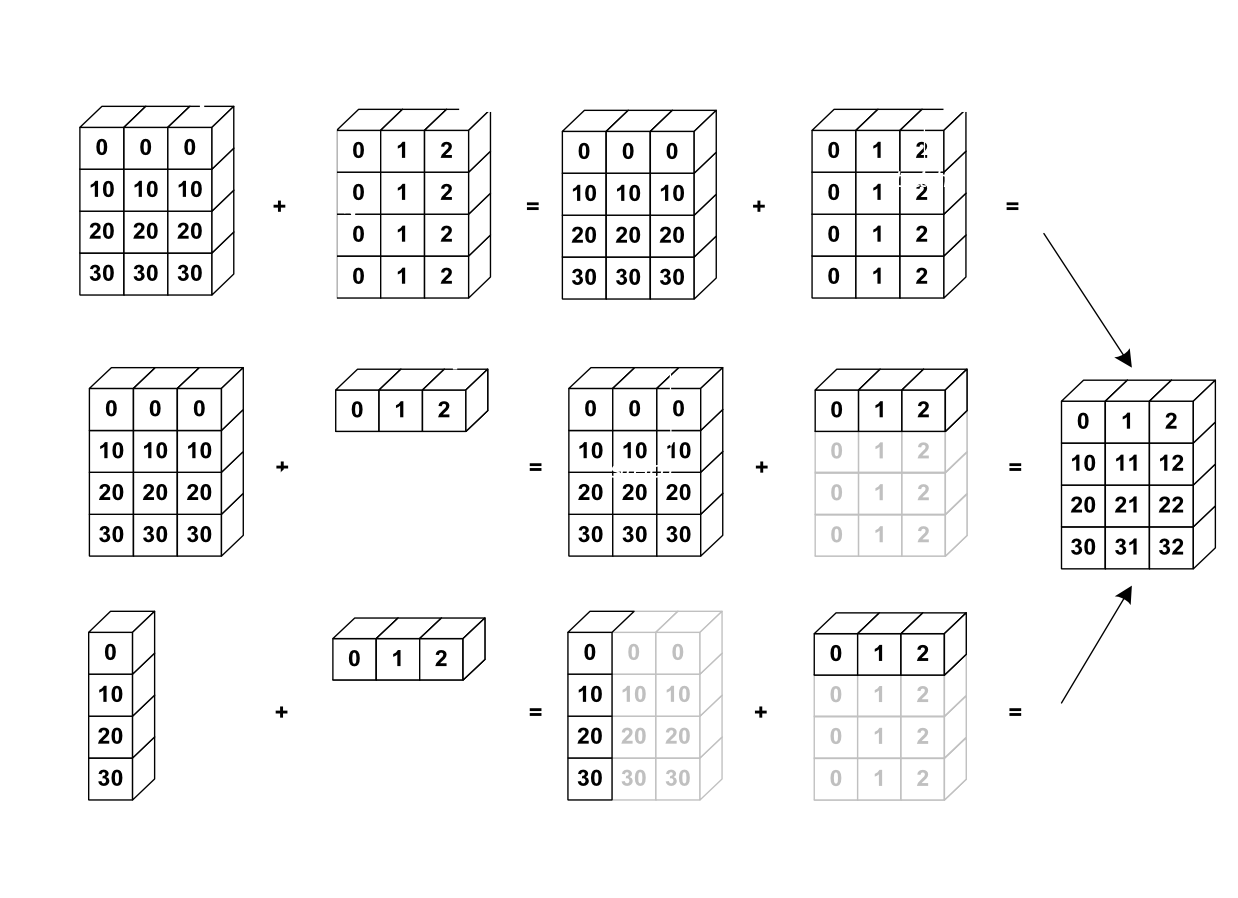

Let's verify:

In [ ]:
np.arange(0, 40, 10)

array([ 0, 10, 20, 30])

In [ ]:
np.tile(np.arange(0, 40, 10), (3, 1))

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

In [ ]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [ ]:
b = np.array([0, 1, 2])

In [ ]:
b

array([0, 1, 2])

In [ ]:
a.shape, b.shape

((4, 3), (3,))

In [ ]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

We have already used broadcasting without knowing it!:

In [ ]:
a = np.ones((4, 5))
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
a[0] = 2    # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

A useful trick:

In [ ]:
a = np.arange(0, 40, 10)
a, a.shape

(array([ 0, 10, 20, 30]), (4,))

In [ ]:
a = a[:, np.newaxis]    # adds a new axis -> 2D array
a.shape

(4, 1)

In [ ]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [ ]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## 6.2.4. Array shape manipulations

### Flattening

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [ ]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out "first".

### Reshaping

The inverse operation to flattening:


In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.shape

(2, 3)

In [ ]:
b = a.ravel()

In [ ]:
b = b.reshape((3, 2))

In [ ]:
b

array([[1, 2],
       [3, 4],
       [5, 6]])

Or,

In [ ]:
a.reshape((2, -1))    # unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

 **Warning:** `ndarray.reshape` **may** return a *view*, or *copy*

In [ ]:
b[0, 0] = 99

In [ ]:
a

array([[99,  2,  3],
       [ 4,  5,  6]])

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
c = a.T.reshape(3*2)
c

array([1, 4, 2, 5, 3, 6])

In [ ]:
c[0] = 99

In [ ]:
a

array([[1, 2, 3],
       [4, 5, 6]])

### Adding a dimension

Indexing with the `np.newaxis` object allows us to add an axis to an array (you have seen this already above in the broadcasting section):

In [ ]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [ ]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [ ]:
z[np.newaxis, :]

array([[1, 2, 3]])

### Dimension shuffling

In [ ]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [ ]:
a[0, 2, 1]

np.int64(5)

In [ ]:
b = a.transpose(1, 2, 0)

In [ ]:
b[2, 1, 0]

np.int64(5)

Dimension shuffling creates a view:

In [ ]:
b[2, 1, 0] = -1

In [ ]:
a[0, 2, 1]

np.int64(-1)

### Resizing

Size of an array can be changed with `ndarray.resize`:

In [ ]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

However, it must not be referred to somewhere else:

In [ ]:
b = a
a.resize((4,))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

## 6.2.5. Sorting data

Sorting along an axis:

In [ ]:
a = np.array([[4, 3, 5], [1, 2, 1]])
a

array([[4, 3, 5],
       [1, 2, 1]])

In [ ]:
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

**Note:** Sorted each row (across columns) separately!

In-place sort:

In [ ]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

Sorting with fancy indexing:


In [ ]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

Finding minima and maxima:


In [ ]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(np.int64(0), np.int64(2))

## Exercise

1. Compute the distances (in miles) between the Route 66 cities—Chicago, Springfield, Saint Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, and Los Angeles—using the `milepost` information given below for each city.



In [ ]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

In [ ]:
import numpy as np

In [ ]:
mileposts=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
np.abs(mileposts-mileposts[:,np.newaxis])

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

2. Compute the distance from the origin of points on a 5x5 grid.

In [ ]:
x, y = np.arange(5), np.arange(5)

In [ ]:
dist = np.sqrt((x - 0)**2 + (y[:, np.newaxis] - 0)**2)
dist

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])